<center><font face='Georgia'> 

# Images Processing. 

    
<center><font size=5 color ='grey' > <i><b> Projet <b></i> : Traffic Pannels Recognition  </center></font>
                 
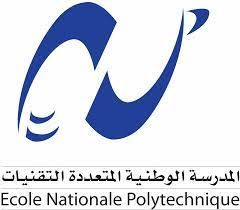


------



> **Done by :**
<font color ='darkblue' face='Georgia' >    
 1.OUCHENE Souhil.  
 2.TOUATI Islem.
</font>
    
> **January 2023**
    



## Importing Packages and Modules

Where the new used packages in the purpose of our project are : 
- PIL (Python Imaging Library): Used for image processing, including opening and manipulating image files.
- cv2 (OpenCV): OpenCV is a computer vision library used for image processing tasks.
- skimage.feature (hog): Likely used for feature extraction, specifically Histogram of Oriented Gradients (HOG).
- sklearn.neural_network.MLPClassifier: Provides a Multi-layer Perceptron (MLP) neural network classifier for machine learning tasks, potentially image classification in this project.

In [108]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from PIL import Image
import os
import cv2 as cv
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

## Importing Data:
We import images from `specific directories` for different traffic sign classes (e.g., "avertissement de danger," "interdiction ou restriction," and "obligation"). It checks if each file is a `PNG image` and then loads and appends the images to separate lists corresponding to their respective classes

In [109]:
directory = "C:\\Users\\Computer House\\Desktop\\Traffic routier\\classe avertissement de danger"
avertissement = []
# Boucler tous le dossier classe avertissement de danger
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        avertissement.append(Image.open(os.path.join(directory, filename)))
        
        
        
        

directory = "C:\\Users\\Computer House\\Desktop\\Traffic routier\\classe interdicition ou restriction"
interdicition = []
# Boucler tous le dossier classe interdicition ou restriction
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        interdicition.append((Image.open(os.path.join(directory, filename))))
        
        


directory = "C:\\Users\\Computer House\\Desktop\\Traffic routier\\classe obligation"
obligation = []
# Boucler tous le dossier classe obligation
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        obligation.append(Image.open(os.path.join(directory, filename)))

## Displaying Images:

The code provided is used to display images from each class as a grid of 10 rows and 5 columns, resulting in a total of 50 images. **We should first specify the class** :

### Classe des avertissements :

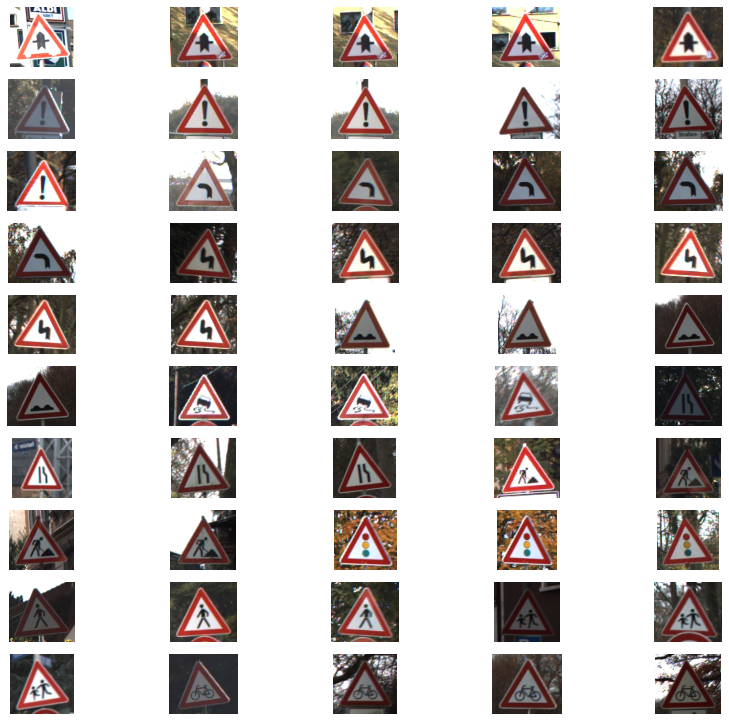

In [110]:
rows = 10
columns = 5
fig, axs = plt.subplots(rows, columns, figsize=(14, 13))
axs = axs.ravel()

# Affichage
for i, ax in enumerate(axs):
    ax.imshow(avertissement[i])
    ax.axis('off')
plt.show()

### Classe des interdictions : 

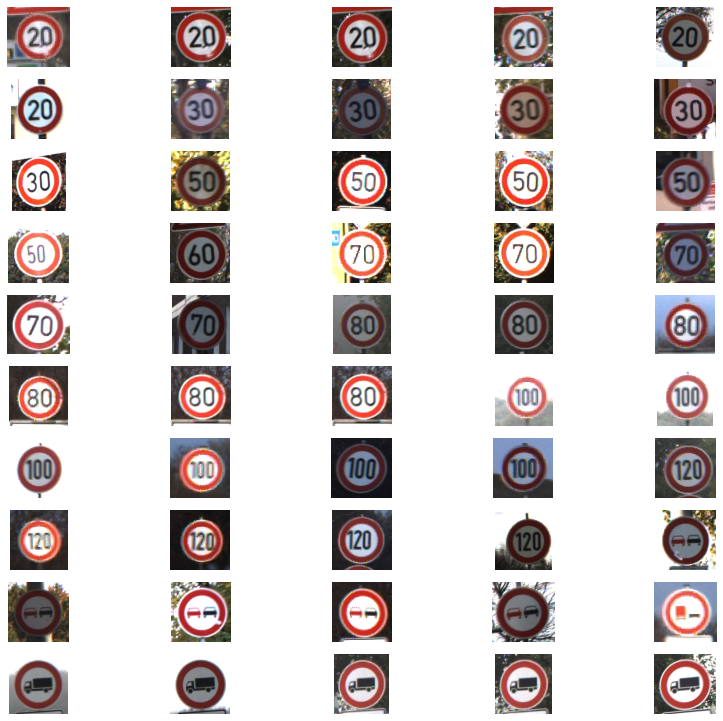

In [111]:
rows = 10
columns = 5
fig, axs = plt.subplots(rows, columns, figsize=(14, 13))
axs = axs.ravel()

# Affichage
for i, ax in enumerate(axs):
    ax.imshow(interdicition[i])
    ax.axis('off')

plt.show()

### Classe des obligations :

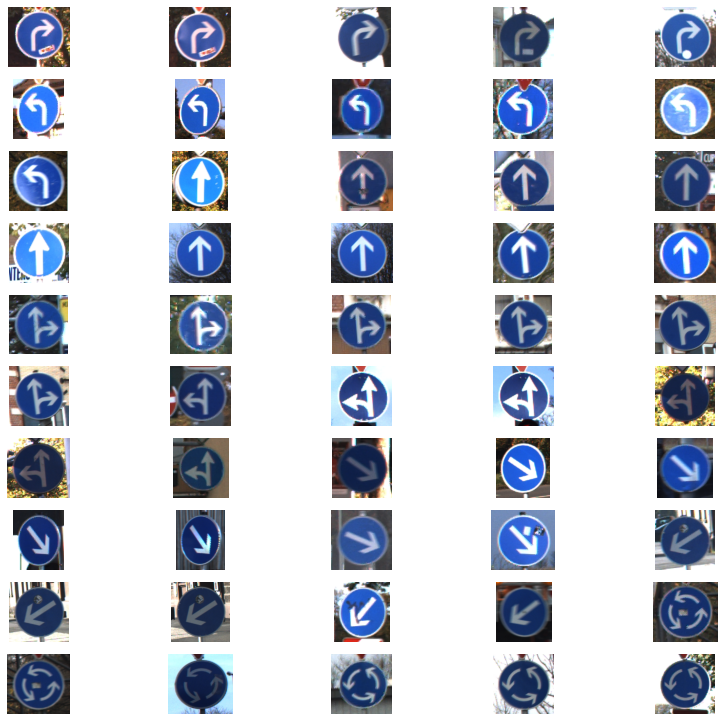

In [112]:
rows = 10
columns = 5
fig, axs = plt.subplots(rows, columns, figsize=(14, 13))
axs = axs.ravel()

# Affichage
for i, ax in enumerate(axs):
    ax.imshow(obligation[i])
    ax.axis('off')
plt.show()

## Concatenating Images :
In the following section, the code will concatenate all the images from each class into a single class called `all_images`. This process combines images from multiple classes into one cohesive dataset.

In [113]:
all_images = []
all_images.extend(avertissement)
all_images.extend(interdicition)
all_images.extend(obligation)
len(all_images)

150

the length of the all_images list is 150, it correctly corresponds to the total number of images of our concatenated dataset. This is a crucial step in data preparation, ensuring that all images from different classes have been successfully combined into a single dataset, which can then be used for the next steps. `having the same processing`

## Median Filter:
Here is a `brief def` about this filter. It is a non-linear image processing technique that replaces each pixel in an image with the median value of the pixel values in a local neighborhood. It is commonly used to reduce noise and preserve edges in images, making it especially useful for tasks like image denoising and enhancement. 

To apply a median filter to the images, you'll need the pixel matrices of the images. We will store them in a matrix :

In [114]:
all_images_matrix = [np.array(image) for image in all_images]

and then, the steps to follow are :
- Creating a 3x3 Mask.
- Applying the Mask to Image Matrices.
- Conversion of Matrices back to Images.

In [115]:
all_images_filtre_median = [cv.medianBlur(image , 3 ) for image in all_images_matrix] 
all_images_filtre = [np.uint8(image_filtre) for image_filtre in all_images_filtre_median] 

we want to demonstrate the process with the 60th image as follows :

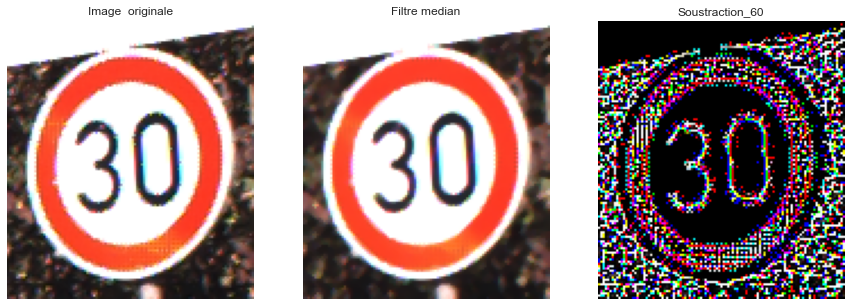

In [116]:
# pour tester si le filtre est bien applique, on definit la matrice de soustraction :
image_soustraction_60 = all_images_matrix[60] - all_images_filtre_median[60]

#Affichage:
fig=plt.figure(figsize=(15, 15))

fig.add_subplot(1,3,1)
plt.title("Image  originale")
plt.imshow(all_images[60], cmap = "gray")
plt.axis('off')



fig.add_subplot(1,3,2)
plt.title("Filtre median")
plt.imshow(all_images_filtre[60], cmap = "gray")
plt.axis('off')

fig.add_subplot(1,3,3)
plt.title("Soustraction_60")
plt.imshow(image_soustraction_60, cmap = "gray")
plt.axis('off')


plt.show()

To confirm that the median filter has been applied to the 60th image, we can easily compare the original image with the filtered image and visually inspect the results(`same for difference`). It is a better image i guess !!

## Converting RGB to Y'CbCr:

To perform the conversion from `RGB to Y'CbCr`, you can use the `cv2.cvtColor()` function. The **Y'CbCr color space separates an image into its luminance (Y) and chrominance (Cb and Cr) components**.

In [117]:
all_images_ycbr = [cv.cvtColor(image, cv.COLOR_RGB2YCrCb) for image in all_images_matrix]

## Resizing Images:

To resize images, you can use the cv2.resize() function from the OpenCV library. This function allows you to specify the target dimensions for resizing the images.

In [118]:
dim = (128,64)
all_images_ycbr = [cv.resize(image , dim , interpolation = cv.INTER_AREA) for image in all_images_ycbr]

In [119]:
all_images_ycbr[60].shape

(64, 128, 3)

The displayed resized image confirms that the images have been uniformly resized to the desired dimensions.

## Generating Oriented Gradient Histograms: HOG


HOG is a feature descriptor used to represent the shape of an object by encoding gradient information from an image. It involves dividing an image into small cells and calculating the histogram of gradient orientations within each cell, which are then concatenated to form a feature vector. According to this definition, we should have: **orientations(9), pixel cells(8x8), and pixel blocks(16x16)**.

In [120]:
HOG = [hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), multichannel=True) for image in all_images_ycbr]

**Feature Vector Size:**

A detection window of 64x128 pixels was used. The image was initially resized to (64, 128), divided into smaller regions, and gradients and orientations for each region were calculated. It's divided into 8x16 = 128 cell blocks with a 50% overlap. This results in 7 blocks in the horizontal direction and 15 blocks in the vertical direction:

7 * 15 = 105 blocks in total, with each block composed of 2x2 cells, each cell having 8x8 pixels.

So, there are 105 blocks in total, and each block has a 36 × 1 vector. The size of the feature vector for each image is:

36 * 105 = 3780.

## Splitting Data into Train/Test Sets:

We will encode first our data into **classes 0, 1 and 2** :

In [121]:
data = np.asarray(HOG)

label = []
# On prend 0 comme classe de avertissement, 1 : interdiction et 2 : obligations
for i in range(50):
    label.append(0)
for i in range(50,100):
    label.append(1)
for i in range(100,150):
    label.append(2)
    
print("the shape of the array is : " , data.shape)
print("an example how the data appear in our data : \n " , data[3])

the shape of the array is :  (150, 3780)
an example how the data appear in our data : 
  [0.02162189 0.         0.02477392 ... 0.08328762 0.         0.00889457]


then we will split the data as follows:

In [122]:
x_train, x_test, y_train, y_test = train_test_split( data , label , test_size =1/3 , random_state =42 , shuffle=True )
print("The shape of the train data",x_train.shape)
print("The shape of the test data",x_test.shape)

The shape of the train data (100, 3780)
The shape of the test data (50, 3780)


We can confirm that our data has been split into 1/3 for testing and 2/3 for training.

## K-Nearest Neighbors (KNN) Classification:

K-Nearest Neighbors (KNN) is a simple and effective classification algorithm. It classifies data points based on their similarity to neighboring data points in the feature space.

**Importing Packages and Modules**

In [123]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

We create a function called `knn_classifier` for performing K-Nearest Neighbors (KNN) classification. This function takes two parameters, **k (the number of neighbors) and distance (the metric for distance calculation)**, and uses scikit-learn to create a KNN classifier, train it with the provided training data, and make predictions on the test data. It then calculates and prints the accuracy score, generates a classification report, and displays a confusion matrix as a heatmap. we've prepared a list of distance metrics to test and a list of k values. We iterate through these combinations, calling the knn_classifier function to evaluate and visualize the KNN classifier's performance with different **hyperparameter settings**.

In [124]:
def knn_classifier(k , distance) :
    print("\n\n\n")
    print(f"\033[5m{k=}, {distance=}\033[0m")
    clf = KNeighborsClassifier(n_neighbors = k , metric=distance)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print("The accuracy score is : " , accuracy)
    
    # Creation d'un rapport de classification
    classification = classification_report(y_test, predictions, target_names = ['0', '1', '2'])
    print("\n\n The confusion matrix : \n" , classification)
    
    

    # Matrice de Confusion
    confusion_mat = confusion_matrix(y_test, predictions)
        
    cm_df = pd.DataFrame(confusion_mat)
    cm_df.columns = ['Predicted 0','Predicted 1','Predicted 2']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1',2:'Actual 2'})
    plt.figure(figsize = (5,4))
    plt.title(f"{k=}, {distance=}")
    sns.heatmap(cm_df, annot=True ,cmap = 'magma')
    plt.show()





k=1, distance='manhattan'
The accuracy score is :  0.98


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



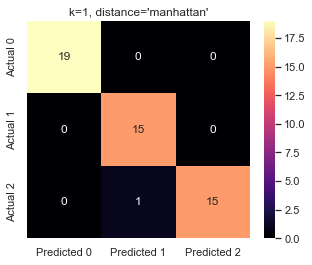





k=1, distance='euclidean'
The accuracy score is :  0.98


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



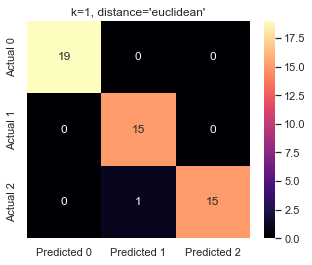





k=1, distance='canberra'
The accuracy score is :  1.0


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



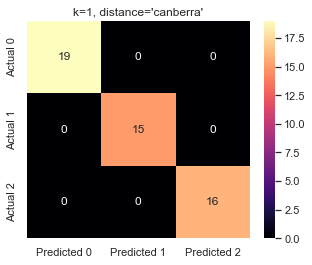





k=3, distance='manhattan'
The accuracy score is :  0.92


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.79      1.00      0.88        15
           2       1.00      0.75      0.86        16

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.91        50
weighted avg       0.94      0.92      0.92        50



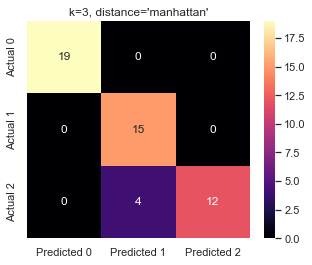





k=3, distance='euclidean'
The accuracy score is :  0.92


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.79      1.00      0.88        15
           2       1.00      0.75      0.86        16

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.91        50
weighted avg       0.94      0.92      0.92        50



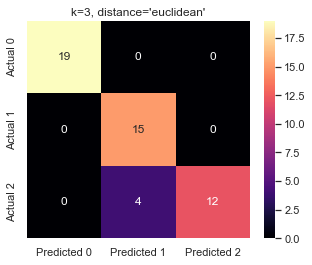





k=3, distance='canberra'
The accuracy score is :  1.0


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



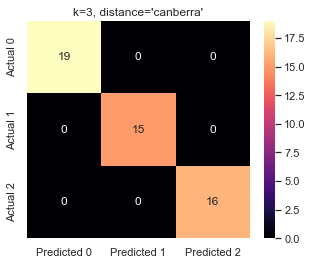





k=5, distance='manhattan'
The accuracy score is :  0.9


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.75      1.00      0.86        15
           2       1.00      0.69      0.81        16

    accuracy                           0.90        50
   macro avg       0.92      0.90      0.89        50
weighted avg       0.93      0.90      0.90        50



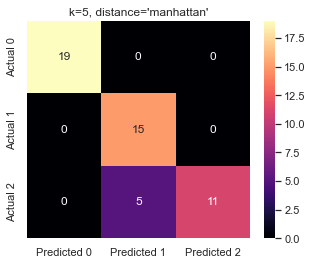





k=5, distance='euclidean'
The accuracy score is :  0.92


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.79      1.00      0.88        15
           2       1.00      0.75      0.86        16

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.91        50
weighted avg       0.94      0.92      0.92        50



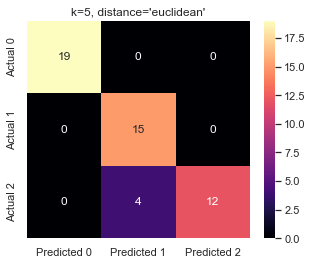





k=5, distance='canberra'
The accuracy score is :  1.0


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



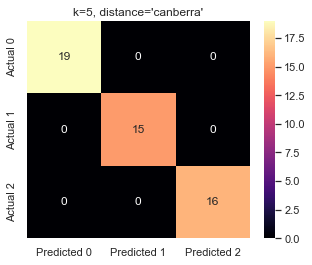





k=7, distance='manhattan'
The accuracy score is :  0.9


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.75      1.00      0.86        15
           2       1.00      0.69      0.81        16

    accuracy                           0.90        50
   macro avg       0.92      0.90      0.89        50
weighted avg       0.93      0.90      0.90        50



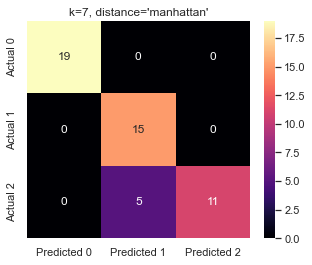





k=7, distance='euclidean'
The accuracy score is :  0.88


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.71      1.00      0.83        15
           2       1.00      0.62      0.77        16

    accuracy                           0.88        50
   macro avg       0.90      0.88      0.87        50
weighted avg       0.91      0.88      0.88        50



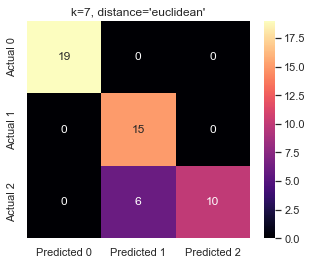





k=7, distance='canberra'
The accuracy score is :  0.96


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      1.00      0.94        15
           2       1.00      0.88      0.93        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



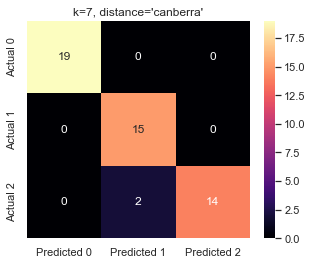





k=9, distance='manhattan'
The accuracy score is :  0.86


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.68      1.00      0.81        15
           2       1.00      0.56      0.72        16

    accuracy                           0.86        50
   macro avg       0.89      0.85      0.84        50
weighted avg       0.90      0.86      0.85        50



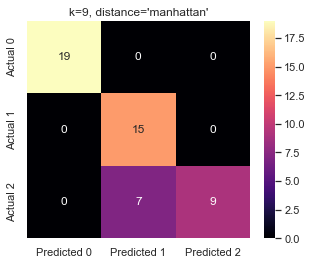





k=9, distance='euclidean'
The accuracy score is :  0.84


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.65      1.00      0.79        15
           2       1.00      0.50      0.67        16

    accuracy                           0.84        50
   macro avg       0.88      0.83      0.82        50
weighted avg       0.90      0.84      0.83        50



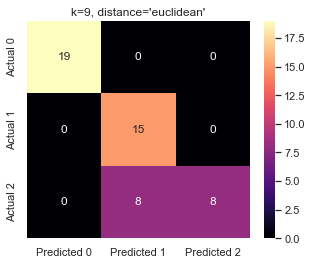





k=9, distance='canberra'
The accuracy score is :  0.96


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      1.00      0.94        15
           2       1.00      0.88      0.93        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



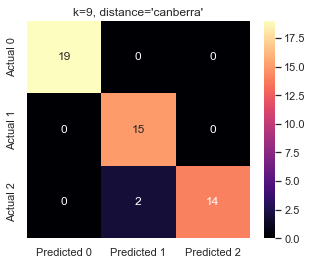

In [125]:
distances = ["manhattan", "euclidean", "canberra"]
k = [1,3,5,7,9]
for k in k:
    for distance in distances:
        knn_classifier(k , distance)


**Analyzing the Confusion Matrix for the Best Result:**
After performing K-Nearest Neighbors (KNN) classification with different hyperparameter settings, we want to analyze the confusion matrix to identify the best result

Observing that the `Canberra` distance is the best for calculation, for `k = {1,3,5}`, we can select one of these three values. Let's choose k = 5. The resulting confusion matrix is as follows





k=5, distance='canberra'
The accuracy score is :  1.0


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



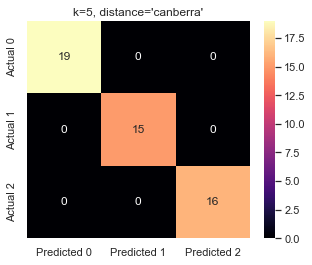

In [126]:
knn_classifier(5 , "canberra")

It predicted all the classes well !!

## Classification using Multilayer Perceptron (MLP):

A Multilayer Perceptron (MLP) is a type of `feedforward neural network` that can be used for various classification tasks.

In [127]:
# liste du nombre de neurones dans les couches cachees 
neurons = [2,6,10, 20 , 50, 100, 150, 200]

# Iteration sur differents nombres de neurones
for n in neurons:
    # Initialiser le MLPClassifier avec 2 couches cachees
    mlp = MLPClassifier(hidden_layer_sizes=(int(n/2), n), max_iter=10000, random_state=0 , activation ='logistic')

    # le Train du modele
    mlp.fit(x_train, y_train)

    # Evaluation du modele
    train_acc = accuracy_score(y_train, mlp.predict(x_train))
    test_acc = accuracy_score(y_test, mlp.predict(x_test))
    
    

    # Verification de la precision du modele du Train
    if train_acc > 0.95:
        print("Number of neurons in the first layer is : ", int(n/2) ,"\tNumber of neurons in the second layer is : " , n)
        print("The Train Accuracy is : " , train_acc)
        Number_neurons = [int(n/2) , n ]
        train_accuracy = train_acc
        break

Number of neurons in the first layer is :  3 	Number of neurons in the second layer is :  6
The Train Accuracy is :  1.0


The best model have **3 neurons in the first layer** and **6 neurons in the seond layer** </br>
We will see the performance of our MLP:

In [128]:
mlp_model = mlp = MLPClassifier(hidden_layer_sizes=Number_neurons, max_iter=10000, random_state=0 , activation ='logistic')
mlp_model.fit(x_train, y_train)
prediction = mlp_model.predict(x_test)

The accuracy score is :  1.0


 The confusion matrix : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



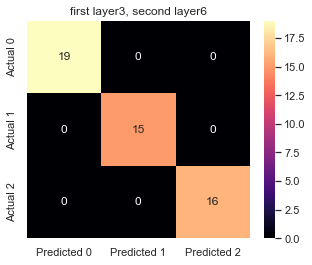

In [129]:
accuracy = accuracy_score(y_test, prediction)
print("The accuracy score is : " , accuracy)

# Rapport de classification
classification = classification_report(y_test, prediction, target_names = ['0', '1', '2'])
print("\n\n The confusion matrix : \n" , classification)



# Matrice de Confusion
conf_matrix = confusion_matrix(y_test, prediction)

mlp_df = pd.DataFrame(conf_matrix)
mlp_df.columns = ['Predicted 0','Predicted 1','Predicted 2']
mlp_df = mlp_df.rename(index={0: 'Actual 0',1:'Actual 1',2:'Actual 2'})
plt.figure(figsize = (5,4))
plt.title(f"first layer{3}, second layer{6}")
sns.heatmap(mlp_df, annot=True ,cmap = 'magma')
plt.show()

## KNN vs. MLP:
KNN (K-Nearest Neighbors) and MLP (Multilayer Perceptron) are two different classification methods used in machine learning.

- KNN is a non-parametric, instance-based learning method that classifies a data point based on the majority of its k nearest neighbors. It is simple to implement and computationally efficient for small data sets.

- MLP, on the other hand, is a type of neural network used for classification. MLPs consist of layers of interconnected neurons and can be used for various machine learning tasks, including classification.

We will prefer the **MLP** in our case !!